# High-Resolution Deep Convolutional Generative Adversarial Networks
J. D. Curtó, I. C. Zarza, Fernando de la Torre, Irwin King, Michael R. Lyu

## Data Preparation

In [ ]:
from crawler import crawler, purify_sources

# load urls of images into local file
crawler.run()
purify_sources.purify()


In [ ]:
from crawler import downloader

# download actual images into folder
downloader.run()

In [ ]:
from preprocessing import cropper

cropper.crop_to_face()

## Training

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import tensorflow as tf
# MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1) / 255.
# x_train = x_train[:500,]
x_train.shape

(60000, 28, 28, 1)

In [3]:
from gan import GAN, DCGAN

gan = DCGAN(shape=(28,28,1), train_combined=False)

gan.set_training_data(x_train)

In [ ]:
gan.generator.summary()


In [ ]:
gan.discriminator.summary()

In [4]:
gan.train_explicit(epochs=500)

 Generator loss: 0.5150130987167358
Iteration 277: Discriminator loss: 1.4074026346206665, Generator loss: 0.5154104232788086
Iteration 278: Discriminator loss: 1.406649112701416, Generator loss: 0.5155972242355347
Iteration 279: Discriminator loss: 1.4077990055084229, Generator loss: 0.5158543586730957
Iteration 280: Discriminator loss: 1.404463768005371, Generator loss: 0.5168083906173706
Iteration 281: Discriminator loss: 1.4061520099639893, Generator loss: 0.5166067481040955
Iteration 282: Discriminator loss: 1.4061834812164307, Generator loss: 0.5177605152130127
Iteration 283: Discriminator loss: 1.407599925994873, Generator loss: 0.5173537731170654
Iteration 284: Discriminator loss: 1.4057005643844604, Generator loss: 0.5183120965957642
Iteration 285: Discriminator loss: 1.404872179031372, Generator loss: 0.5180820226669312
Iteration 286: Discriminator loss: 1.4045696258544922, Generator loss: 0.5188148617744446
Iteration 287: Discriminator loss: 1.4036763906478882, Generator los

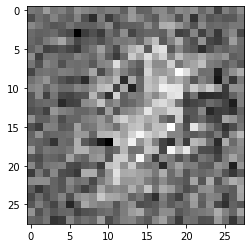

In [10]:
import matplotlib.pyplot as plt

img = gan.generate()
plt.imshow(img[0, :,:,0], cmap='gray')
plt.show()

In [ ]:
gan.export("gan/models/dcgan test")

In [ ]:
gan.import_('gan/models/dcgan test')

In [ ]:
import numpy as np
noise = np.random.normal(0, 1, (5, 100))
batch_fake = gan.generator.predict(noise)

res = gan.discriminator.predict(batch_fake)
res

In [ ]:
res = gan.discriminator.predict(x_train[15:20])
res